In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 9)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Loading csv file
df= pd.read_csv('metal.csv')
df.head()

,metals_daily_train.csv,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
0,20080701.0,NaN,NaN,NaN,24.72,24.85,23.77,23.80,24.66,24.72,...,16175.0,16240.0,16055.0,16165.0,16185.0,16250.0,16080.0,16145.0,2008.0,20080630.0
1,20080702.0,NaN,NaN,NaN,23.80,24.99,23.67,24.95,23.72,24.80,...,16130.0,16170.0,15910.0,16045.0,16125.0,16180.0,15880.0,16020.0,2008.0,20080630.0
2,20080703.0,NaN,NaN,NaN,24.80,25.25,24.49,24.69,24.65,25.06,...,15825.0,15960.0,15470.0,15650.0,15900.0,15950.0,15385.0,15640.0,2008.0,20080630.0
3,20080704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15060.0,15260.0,15060.0,15175.0,15055.0,15250.0,15055.0,15155.0,2008.0,20080630.0
4,20080707.0,NaN,NaN,NaN,24.30,25.30,24.19,24.78,24.33,25.10,...,15100.0,15255.0,15100.0,15190.0,15010.0,15240.0,15010.0,15165.0,2009.0,20080707.0


In [3]:
df.tail()

,metals_daily_train.csv,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
2629,20180515.0,558.735883,584.378351,581.679143,14.45,15.50,14.40,15.325,14.96,15.85,...,23605.0,23880.0,23560.0,23760.0,23480.0,23795.0,23450.0,23640.0,2523.0,20180514.0
2630,20180516.0,560.979551,583.904196,583.904196,15.30,15.42,14.60,14.675,15.76,15.83,...,23800.0,24050.0,23730.0,23890.0,23695.0,23980.0,23630.0,23790.0,2523.0,20180514.0
2631,20180517.0,558.631274,584.145683,582.802820,14.65,14.86,14.27,14.375,15.33,15.45,...,23825.0,24000.0,23640.0,23845.0,23745.0,23930.0,23530.0,23755.0,2523.0,20180514.0
2632,20180518.0,559.704335,585.267754,585.267754,14.35,14.80,14.22,14.525,15.07,15.36,...,23660.0,23930.0,23660.0,23815.0,23590.0,23820.0,23560.0,23700.0,2523.0,20180514.0
2633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
p1=df

In [5]:
#Predicting price of p1 only
#p1 = p1.drop(['p0', 'p2'], axis=1)
#Drop all rows where all column values are NaN
p1 = p1.dropna(how='all')
#Atleast 100 values to be present in row for it to be considered, 10 was arbitrarily chosen
p1 = p1.dropna(thresh=100)
p1.tail()

,metals_daily_train.csv,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
2628,20180514.0,555.885726,581.521233,582.870470,14.65,14.70,14.20,14.475,15.35,15.35,...,23880.0,23910.0,23630.0,23755.0,23745.0,23820.0,23515.0,23665.0,2523.0,20180514.0
2629,20180515.0,558.735883,584.378351,581.679143,14.45,15.50,14.40,15.325,14.96,15.85,...,23605.0,23880.0,23560.0,23760.0,23480.0,23795.0,23450.0,23640.0,2523.0,20180514.0
2630,20180516.0,560.979551,583.904196,583.904196,15.30,15.42,14.60,14.675,15.76,15.83,...,23800.0,24050.0,23730.0,23890.0,23695.0,23980.0,23630.0,23790.0,2523.0,20180514.0
2631,20180517.0,558.631274,584.145683,582.802820,14.65,14.86,14.27,14.375,15.33,15.45,...,23825.0,24000.0,23640.0,23845.0,23745.0,23930.0,23530.0,23755.0,2523.0,20180514.0
2632,20180518.0,559.704335,585.267754,585.267754,14.35,14.80,14.22,14.525,15.07,15.36,...,23660.0,23930.0,23660.0,23815.0,23590.0,23820.0,23560.0,23700.0,2523.0,20180514.0


In [6]:
#Renaming Date and p1 columns
p1.rename(columns={'metals_daily_train.csv': 'Date', 'p1': 'Price'}, inplace=True)
p1.head()

,Date,p0,Price,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
0,20080701.0,NaN,NaN,NaN,24.72,24.85,23.77,23.80,24.66,24.72,...,16175.0,16240.0,16055.0,16165.0,16185.0,16250.0,16080.0,16145.0,2008.0,20080630.0
1,20080702.0,NaN,NaN,NaN,23.80,24.99,23.67,24.95,23.72,24.80,...,16130.0,16170.0,15910.0,16045.0,16125.0,16180.0,15880.0,16020.0,2008.0,20080630.0
2,20080703.0,NaN,NaN,NaN,24.80,25.25,24.49,24.69,24.65,25.06,...,15825.0,15960.0,15470.0,15650.0,15900.0,15950.0,15385.0,15640.0,2008.0,20080630.0
3,20080704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15060.0,15260.0,15060.0,15175.0,15055.0,15250.0,15055.0,15155.0,2008.0,20080630.0
4,20080707.0,NaN,NaN,NaN,24.30,25.30,24.19,24.78,24.33,25.10,...,15100.0,15255.0,15100.0,15190.0,15010.0,15240.0,15010.0,15165.0,2009.0,20080707.0


In [7]:
#Formatting Date
p1['Date'] = pd.to_datetime(p1['Date'].astype(str), format='%Y%m%d')
p1.head()

,Date,p0,Price,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
0,2008-07-01,NaN,NaN,NaN,24.72,24.85,23.77,23.80,24.66,24.72,...,16175.0,16240.0,16055.0,16165.0,16185.0,16250.0,16080.0,16145.0,2008.0,20080630.0
1,2008-07-02,NaN,NaN,NaN,23.80,24.99,23.67,24.95,23.72,24.80,...,16130.0,16170.0,15910.0,16045.0,16125.0,16180.0,15880.0,16020.0,2008.0,20080630.0
2,2008-07-03,NaN,NaN,NaN,24.80,25.25,24.49,24.69,24.65,25.06,...,15825.0,15960.0,15470.0,15650.0,15900.0,15950.0,15385.0,15640.0,2008.0,20080630.0
3,2008-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15060.0,15260.0,15060.0,15175.0,15055.0,15250.0,15055.0,15155.0,2008.0,20080630.0
4,2008-07-07,NaN,NaN,NaN,24.30,25.30,24.19,24.78,24.33,25.10,...,15100.0,15255.0,15100.0,15190.0,15010.0,15240.0,15010.0,15165.0,2009.0,20080707.0


In [8]:
#Removing Rows where Price is NaN
p1=p1.dropna(subset=['Price'])
p1.head()

,Date,p0,Price,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
109,2008-12-01,444.511058,457.032497,457.032497,53.08,56.33,52.62,56.29,49.11,52.15,...,9420.0,9680.0,9315.0,9540.0,9520.0,9800.0,9495.0,9650.0,2030.0,20081201.0
110,2008-12-02,446.908899,465.530103,459.323035,55.99,56.29,54.68,55.30,51.80,52.24,...,9480.0,9600.0,9430.0,9510.0,9640.0,9730.0,9560.0,9630.0,2030.0,20081201.0
111,2008-12-03,453.484820,482.060575,459.696940,56.50,56.72,54.65,55.21,53.01,53.02,...,9495.0,9580.0,9400.0,9500.0,9530.0,9690.0,9505.0,9590.0,2030.0,20081201.0
112,2008-12-04,447.532919,472.395859,459.964389,55.50,57.81,54.88,57.62,51.75,54.42,...,9485.0,9485.0,9120.0,9145.0,9400.0,9445.0,9205.0,9225.0,2030.0,20081201.0
113,2008-12-05,447.084228,471.922241,459.503235,58.50,60.00,56.63,56.75,54.70,56.18,...,8710.0,9000.0,8595.0,8665.0,8885.0,8940.0,8670.0,8715.0,2030.0,20081201.0


In [9]:
#We consider settle (closing) prices of features for prediction
cols = [c for c in p1.columns if c[5:] == 'settle' or c=='Date' or c=='Price' or c=='p0' or c=='p2']
p1 = p1[cols]
p1.head()

,Date,p0,Price,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,...,f128_settle,f129_settle,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle
109,2008-12-01,444.511058,457.032497,457.032497,56.29,51.91,0.6421,31.40,31.83,1.4924,...,514.4,516.4,12545.0,12560.0,28410.0,27300.0,11655.0,10690.0,9540.0,9650.0
110,2008-12-02,446.908899,465.530103,459.323035,55.30,51.78,0.6354,30.77,31.20,1.4895,...,504.8,504.8,12185.0,12215.0,28260.0,27040.0,11190.0,10300.0,9510.0,9630.0
111,2008-12-03,453.484820,482.060575,459.696940,55.21,51.21,0.6387,30.58,30.98,1.4734,...,497.7,497.7,11715.0,11830.0,27800.0,26530.0,10605.0,10050.0,9500.0,9590.0
112,2008-12-04,447.532919,472.395859,459.964389,57.62,53.94,0.6413,29.50,29.87,1.4746,...,490.1,490.1,11250.0,11240.0,26760.0,25530.0,10055.0,9735.0,9145.0,9225.0
113,2008-12-05,447.084228,471.922241,459.503235,56.75,53.58,0.6404,28.55,28.93,1.4696,...,496.3,496.3,10685.0,10590.0,25450.0,24270.0,9965.0,9150.0,8665.0,8715.0


In [10]:
#Only features have null values
#Filling NaN values with values seen last in column since it's a continuous forecast
p1.fillna(method='ffill', inplace=True)
#Checking for null values
p1.isnull().sum()
#p1 = p1.groupby(['Date', pd.Grouper(key='Date', freq='W-MON')])['f000_settle'].mean().reset_index().sort_values('Date')

Date           0
p0             0
Price          0
p2             0
f000_settle    0
f001_settle    0
f002_settle    0
f003_settle    0
f004_settle    0
f005_settle    0
f006_settle    0
f007_settle    0
f008_settle    0
f009_settle    0
f010_settle    0
f011_settle    0
f012_settle    0
f013_settle    0
f014_settle    0
f015_settle    0
f016_settle    0
f017_settle    0
f018_settle    0
f019_settle    0
f020_settle    0
f021_settle    0
f022_settle    0
f023_settle    0
f024_settle    0
f025_settle    0
              ..
f108_settle    0
f109_settle    0
f110_settle    0
f111_settle    0
f112_settle    0
f113_settle    0
f114_settle    0
f115_settle    0
f116_settle    0
f117_settle    0
f118_settle    0
f119_settle    0
f120_settle    0
f121_settle    0
f122_settle    0
f123_settle    0
f124_settle    0
f125_settle    0
f126_settle    0
f127_settle    0
f128_settle    0
f129_settle    0
f130_settle    0
f131_settle    0
f132_settle    0
f133_settle    0
f134_settle    0
f135_settle   

<function matplotlib.pyplot.show(*args, **kw)>

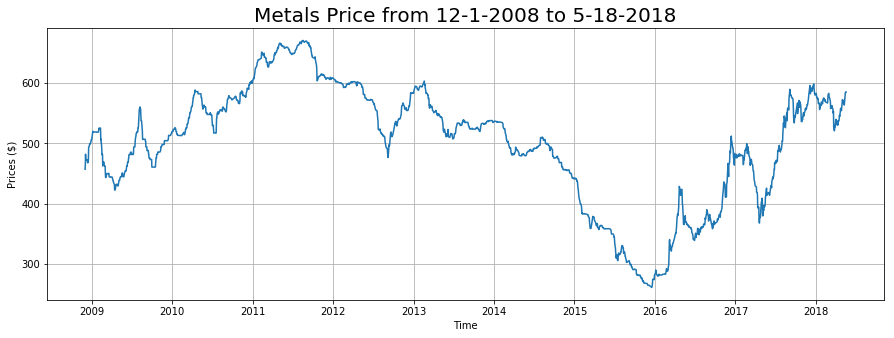

In [11]:
#line chart
plt.figure(figsize = (15, 5))
x = p1['Date']
y = p1['Price']
plot(x,y)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Prices ($)')
plt.title('Metals Price from 12-1-2008 to 5-18-2018',fontsize=20)
plt.show

In [12]:
#p1.set_index('Date', inplace=True)

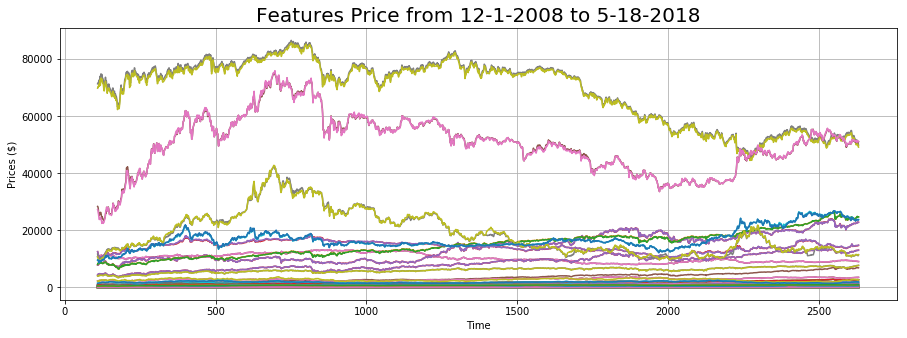

In [13]:
plt.figure(figsize = (15, 5))
plt.plot(p1.iloc[:,1:])
#p1.iloc[:,1:].plot(kind='line')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Prices ($)')
plt.title('Features Price from 12-1-2008 to 5-18-2018',fontsize=20)
#plt.legend(loc='upper right')
plt.show()

In [14]:
p1.to_csv('clean_metal.csv', encoding='utf-8', index=False)